In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

In [16]:
directory = '/Users/aneeshreddyvallapu/Downloads/fer'
emotions_given = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
def data_load(data_dir):
    data = []
    labels = []
    for e in emotions_given:
        emotion_directory = os.path.join(data_dir, e)
        for file in os.listdir(emotion_directory):
            img_path = os.path.join(emotion_directory, file)
            image = Image.open(img_path).convert('L') 
            image = np.array(image)
            data.append(image)
            labels.append(e)
    return np.array(data), np.array(labels)

train_data, train_labels = data_load(os.path.join(directory, 'train'))
test_data, test_labels = data_load(os.path.join(directory, 'test'))
train_counts_label = pd.Series(train_labels).value_counts()
test_counts_label = pd.Series(test_labels).value_counts()
def image_preprocess(img):
    img = np.array(img)
    img = img / 255.0  
    img = img.reshape(img.shape[0], 48, 48, 1)  
    return img

preprocessed_train_data = image_preprocess(train_data)
preprocessed_test_data = image_preprocess(test_data)
encoded_train_labels = to_categorical([emotions_given.index(label) for label in train_labels], num_classes=len(emotions_given))
encoded_test_labels = to_categorical([emotions_given.index(label) for label in test_labels], num_classes=len(emotions_given))
X_train, X_val, y_train, y_val = train_test_split(preprocessed_train_data, encoded_train_labels, test_size=0.2, random_state=42)

In [17]:
def CNN_model(input_shape, num_classes, learning_rate):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [18]:
input_shape = (48, 48, 1)
num_cls = len(emotions_given)
learning_rate =  0.001
model_CNN = CNN_model(input_shape, num_cls, learning_rate)
model_CNN.summary()
batch_size = 32
epochs = 60
history = model_CNN.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, verbose=1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,935 (2.37 MB)

 Trainable params: 619,975 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.2618 - loss: 2.3149 - val_accuracy: 0.4366 - val_loss: 1.4930
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.4192 - loss: 1.5197 - val_accuracy: 0.4817 - val_loss: 1.3665
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.4697 - loss: 1.3944 - val_accuracy: 0.4521 - val_loss: 1.4816
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.4881 - loss: 1.3368 - val_accuracy: 0.4876 - val_loss: 1.3516
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.5026 - loss: 1.3076 - val_accuracy: 0.5084 - val_loss: 1.3052
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5209 - loss: 1.2675 - val_accuracy: 0.5061 - val_loss: 1.2981
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5325 - loss: 1.2378 - val_accuracy: 0.5183 - val_loss: 1.2877
Epoch 8/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5387 - loss: 1.2162 - 

In [19]:
test_loss, test_accuracy = model_CNN.evaluate(preprocessed_test_data, encoded_test_labels, verbose=1)
print(f'Test accuracy: {test_accuracy:.4f}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5589 - loss: 1.3182
Test accuracy: 0.6103


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
predicted = model_CNN.predict(preprocessed_test_data)
predicted_classes = np.argmax(predicted, axis=1)
True_values = np.argmax(encoded_test_labels, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [22]:
accuracy = accuracy_score(True_values, predicted_classes)
precision = precision_score(True_values, predicted_classes, average='weighted')
recall = recall_score(True_values, predicted_classes, average='weighted')
f1 = f1_score(True_values, predicted_classes, average='weighted')

In [23]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.6103
Precision: 0.6223
Recall: 0.6103
F1 Score: 0.6132


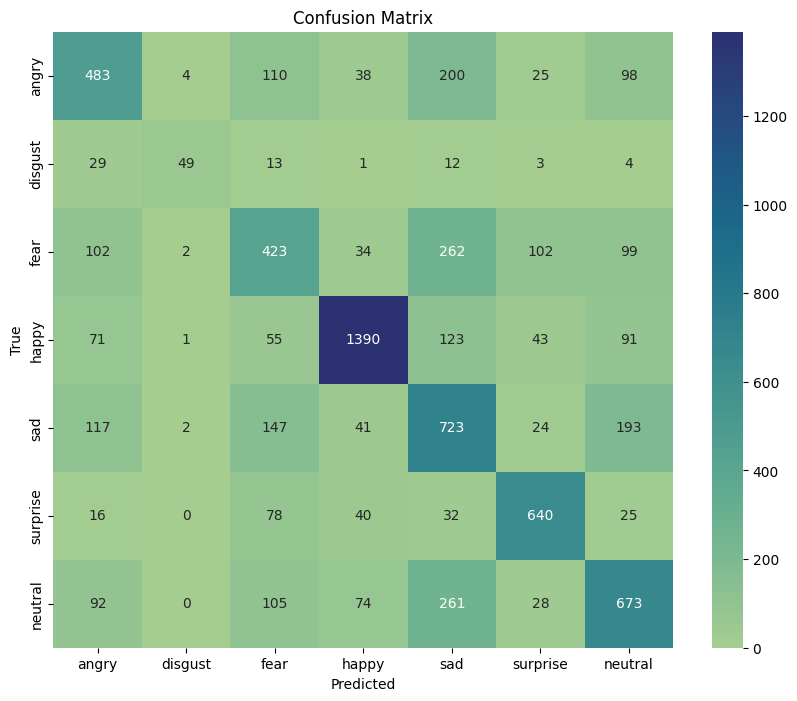

In [25]:
conf_matrix = confusion_matrix(True_values, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="crest", xticklabels=emotions_given, yticklabels=emotions_given)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

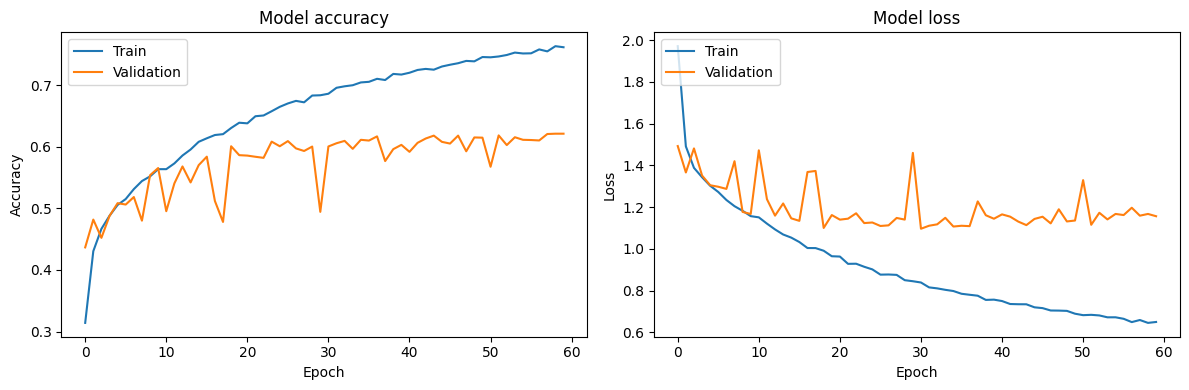

In [26]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)